In [1]:
from finlab.data import Data
import matplotlib.pyplot as plt
from pandas import Series , DataFrame
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (20,8)
data= Data()

stock_id = "1802"
rank = 10
datefrom = "2018-06-04 00:00:00"
dateto = "2018-12-10 00:00:00"

broker = getBro

NameError: name 'getBro' is not defined

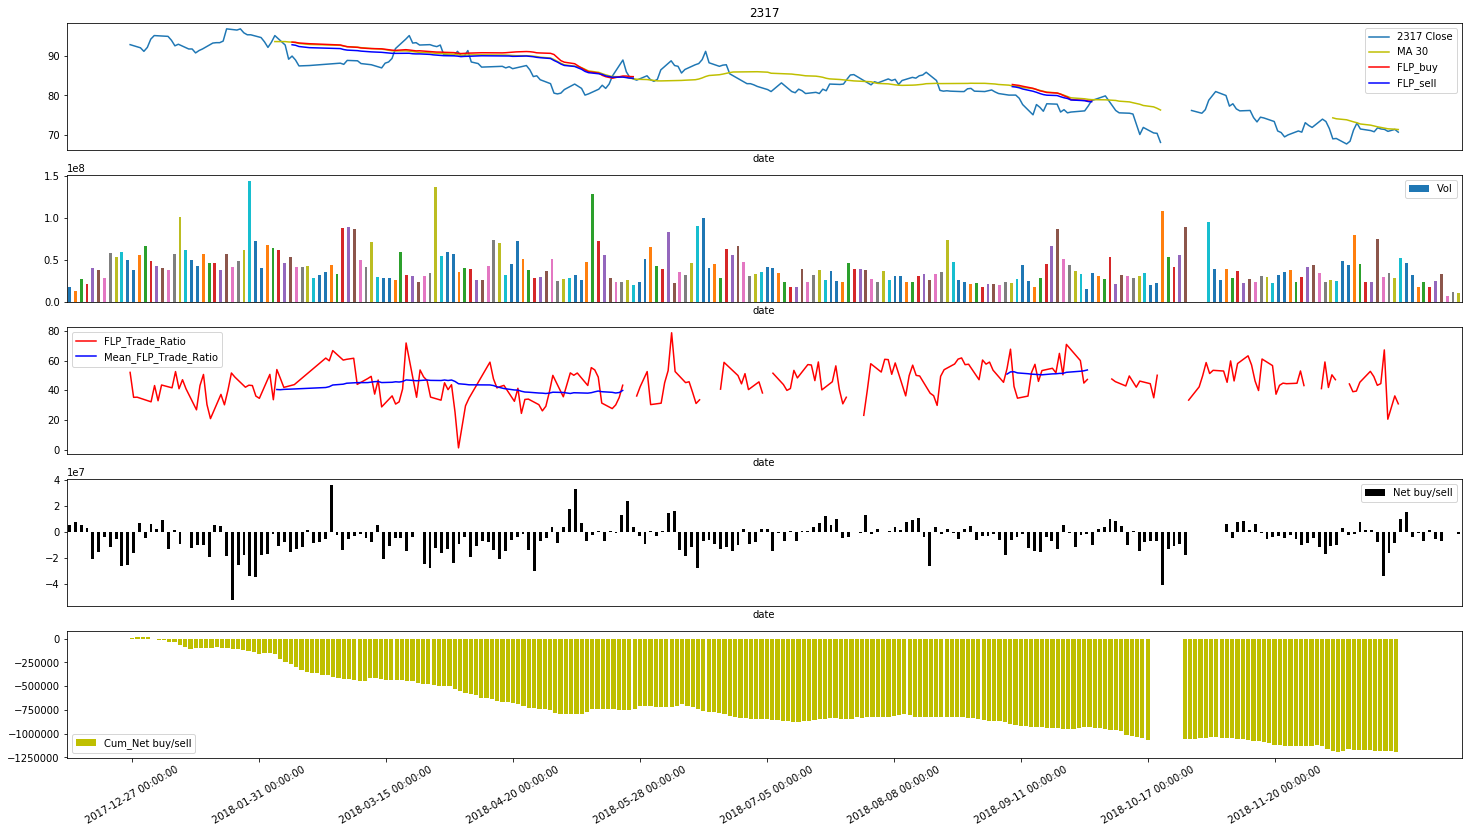

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from talib import abstract
from finlab.data import Data
data = Data()

#參數設定
stock_id='2317'
週期=240
平均成本週期=30

#外資買入（2017-12月後的格式）
陸資買進 = data.get('外陸資買進股數(不含外資自營商)', 週期)
外資買進 = data.get('外資自營商買進股數', 週期)
外資買進 += 陸資買進
外資買進=外資買進.fillna(data.get('外資買進股數', 週期))

# 外資賣出（2017-12月後的格式）
陸資賣出 = data.get('外陸資賣出股數(不含外資自營商)', 週期)
外資賣出 = data.get('外資自營商賣出股數', 週期)
外資賣出 += 陸資賣出
外資賣出=外資賣出.fillna(data.get('外資賣出股數', 週期))

外資買賣超=外資買進-外資賣出

# 收盤價
收盤價 = data.get('收盤價', 週期)
成交股數=data.get('成交股數', 週期)

#外資進出成本
外資買進成本 = (外資買進 * 收盤價).rolling(平均成本週期, min_periods=平均成本週期).sum() / 外資買進.rolling(平均成本週期, min_periods=平均成本週期).sum()
外資賣出成本 = (外資賣出 * 收盤價).rolling(平均成本週期, min_periods=平均成本週期).sum() / 外資賣出.rolling(平均成本週期, min_periods=平均成本週期).sum()

#外資交易占比
外資交易占比=(外資買進+外資賣出)/成交股數/2*100
外資交易占比平均 = 外資交易占比.rolling(平均成本週期, min_periods=平均成本週期).sum() / 平均成本週期

#成本線圖
plt.rcParams["figure.figsize"] = (25,15)
plt.subplot(5,1,1)
收盤價[stock_id].plot(label=stock_id+' Close')
平均收盤價 = 收盤價.rolling(30, min_periods=平均成本週期).sum() / 平均成本週期
平均收盤價[stock_id].plot(label='MA 30',color='y')

外資買進成本[stock_id].plot(label='FLP_buy',color='red')
外資賣出成本[stock_id].plot(label='FLP_sell',color='blue')
plt.xticks([])
plt.title(stock_id)
plt.legend()#增加各線標籤

#成交量
plt.subplot(5,1,2)
# plt.bar(range(len(成交股數[stock_id])),成交股數[stock_id],fc = 'b')
ax = 成交股數[stock_id].plot.bar(label='Vol',rot=30)#rot為旋轉角
ax.set_xticks([])#設定Ｘ座標軸間隔
# 平均成交股數 = 成交股數.rolling(平均成本週期, min_periods=1).sum() / 平均成本週期
# 平均成交股數[stock_id].plot(label='Mean_Vol',color='y')
plt.legend()#增加各線標籤

#外資交易占比
plt.subplot(5,1,3)
外資交易占比[stock_id].plot(label='FLP_Trade_Ratio',color='r')
外資交易占比平均[stock_id].plot(label='Mean_FLP_Trade_Ratio',color='b')
plt.xticks([])
plt.legend()#增加各線標籤

#買賣超圖
plt.subplot(5,1,4)
ax = 外資買賣超[stock_id].plot.bar(label='Net buy/sell',rot=30,fc = 'k')#rot為旋轉角
ax.set_xticks([])#設定Ｘ座標軸間隔
plt.legend()#增加各線標籤

#累積買賣超張數
plt.subplot(5,1,5)
外資買賣超[stock_id]=外資買賣超[stock_id]/1000
plt.bar(range(len(外資買賣超[stock_id])),外資買賣超[stock_id].cumsum(),label='Cum_Net buy/sell',fc='y')
plt.xticks([i for i in range(0, len(外資買賣超[stock_id].index), 24)],外資買賣超[stock_id].index[::24],rotation=30)
plt.legend()#增加各線標籤

In [4]:
import pandas as pd
from finlab.data import Data

def mystrategy(data):
    #參數設定
    週期=2400
    平均成本週期=30
    
    # 收盤價
    收盤價 = data.get('收盤價', 週期)
    成交股數=data.get('成交股數', 週期)

    #外資買入（2017-12月後的格式）
    陸資買進 = data.get('外陸資買進股數(不含外資自營商)', 週期)
    外資買進 = data.get('外資自營商買進股數', 週期)
    外資買進 += 陸資買進
    外資買進=外資買進.fillna(data.get('外資買進股數', 週期))

    # 外資賣出（2017-12月後的格式）
    陸資賣出 = data.get('外陸資賣出股數(不含外資自營商)', 週期)
    外資賣出 = data.get('外資自營商賣出股數', 週期)
    外資賣出 += 陸資賣出
    外資賣出=外資賣出.fillna(data.get('外資賣出股數', 週期))

    外資買賣超=外資買進-外資賣出
    
    #外資交易占比
    外資交易占比=(外資買進+外資賣出)/成交股數/2*100
    外資交易占比平均 = 外資交易占比.rolling(平均成本週期, min_periods=1).sum() / 平均成本週期
    
    #外資進出成本
    外資買進成本 = (外資買進 * 收盤價).rolling(平均成本週期, min_periods=1).sum() / 外資買進.rolling(平均成本週期, min_periods=1).sum()
    外資賣出成本 = (外資賣出 * 收盤價).rolling(平均成本週期, min_periods=1).sum() / 外資賣出.rolling(平均成本週期, min_periods=1).sum()


    #外資套牢股票
    s1 =外資買進成本.iloc[-1].fillna(0)
    s2=收盤價.iloc[-1].fillna(0)
    外資套牢=(s1-s2)>0
    外資套牢=外資套牢[外資套牢==1]
   
    #外資連賣
    外資連賣=(外資買賣超.iloc[-2:]<0).sum()
    外資連賣=外資連賣[外資連賣==2]
    
    #外資近一日交易占比平均大於X

    交易占比=(外資交易占比平均.iloc[-1].dropna()>35)
    交易占比=交易占比[交易占比==1]
    
    
    select_stock=外資套牢&外資連賣&交易占比
    
    
    print('操作檔數:',len(select_stock[select_stock]))
    
    return select_stock[select_stock]

操作檔數: 3
2018-01-01 - 2018-05-01 報酬率: -3.72 % nstock 3
操作檔數: 24
2018-05-01 - 2018-08-29 報酬率: 0.36 % nstock 24


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


操作檔數: 3
2018-08-29 - 2018-12-27 報酬率: -0.34 % nstock 3
每次換手最大報酬 : 0.36 ％
每次換手最少報酬 : -3.72 ％


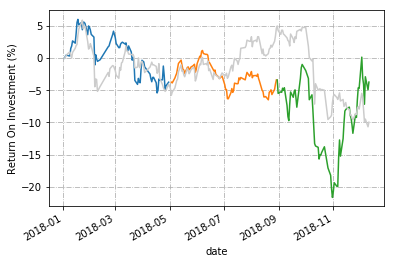

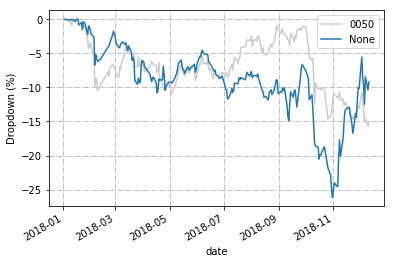

(2018-01-03    1.000000
 2018-01-04    1.003225
 2018-01-05    1.005120
 2018-01-08    1.003692
 2018-01-09    1.003667
 2018-01-10    1.015457
 2018-01-11    1.019057
 2018-01-12    1.027086
 2018-01-15    1.023576
 2018-01-16    1.038325
 2018-01-17    1.055757
 2018-01-18    1.060598
 2018-01-19    1.051945
 2018-01-22    1.055788
 2018-01-23    1.044448
 2018-01-24    1.056458
 2018-01-25    1.056047
 2018-01-26    1.054290
 2018-01-29    1.036658
 2018-01-30    1.050383
 2018-01-31    1.048430
 2018-02-01    1.044031
 2018-02-02    1.037182
 2018-02-05    1.033047
 2018-02-06    0.989440
 2018-02-07    1.005515
 2018-02-08    0.999654
 2018-02-09    0.995198
 2018-02-12    0.997757
 2018-02-21    1.017814
                 ...   
 2018-10-31    0.783164
 2018-11-01    0.792161
 2018-11-02    0.806046
 2018-11-05    0.800462
 2018-11-06    0.800164
 2018-11-07    0.845783
 2018-11-08    0.872726
 2018-11-09    0.847519
 2018-11-12    0.874735
 2018-11-13    0.899074
 2018-11-14    0

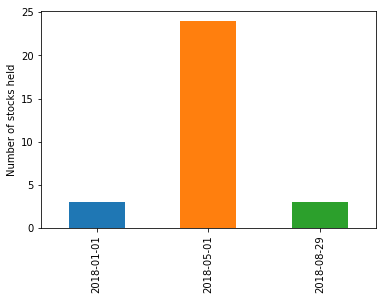

In [5]:
# 起手式
from finlab.backtest import backtest
from finlab.data import Data
import datetime
%matplotlib inline

# 回測
data = Data()
backtest(datetime.date(2018,1,1), datetime.date(2018,12,11), strategy=mystrategy, data=data,hold_days=120)

In [8]:
from finlab.backtest import portfolio

data = Data()

# 利用 mystrategy 來產生股票清單 stocks
stocks = mystrategy(data)
#這樣的投資分配很無聊，因為只是利用手頭上的資金盡可能分配到有的股票，就好像一艘船載滿了人，拼命要拿一個自己有的容器去裝。
#而裝不下的就把比較貴而不是低價值的股票給剔除，其實蠻無理的。
# 用portfolio來幫忙計算，給定 1,000,000 元，依照今天收盤價，股票張數要如何分配
total_invest_money = portfolio(stocks.index, 1000000, data)

# 印出股票資訊
print('---------------')
print('|  portfolio  |')
print('---------------')
print(stocks.index)
print('total cost')
print(total_invest_money)
print('----------selects-------------')
intselects = []
selects = []
print("-------for system input-----------")
for stock in list(stocks.index):
    intselects.append(int(stock))
print(intselects)
print('-------For Markoz potfolio input---------')
for stock in list(stocks.index):
    selects.append((stock))
print(selects)

操作檔數: 0
estimate price according to 2018-12-13 00:00:00
initial number of stock 0


ZeroDivisionError: division by zero